# Zadanie 1

### Juliusz Wasieleski, grupa 1, rok 2, Informatyka, WIET

### Październik 2022

### Import potrzebnych bibliotek

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
from math import sin
from math import cos
from math import pi
from math import log10

### Definiuję punkty A i B, tolerancje i kolory

In [185]:
A = [-1.0,0]
B = [0,0.1]
tolerances = [1e-18, 1e-14, 1e-10]  # tolerancje jakie przyjmuję
colors = np.array(['r', 'b', 'g'])  # kolory do onazacznia na wykresach

### Definiowanie funkcji oblicających wyznaczniki  2x2 i 3x3

In [186]:
def det_2x2(matrix):
    return matrix[0][0]*matrix[1][1] - matrix[1][0]*matrix[0][1]


def det_3x3(matrix):    #obliczanie wyznacznika 3x3 metodą Sarrusa
    output = 0
    output += matrix[0][0]*matrix[1][1]*matrix[2][2]
    output -= matrix[2][0]*matrix[1][1]*matrix[0][2]
    output += matrix[1][0]*matrix[2][1]*matrix[0][2]
    output -= matrix[0][0]*matrix[2][1]*matrix[1][2]
    output += matrix[2][0]*matrix[0][1]*matrix[1][2]
    output -= matrix[1][0]*matrix[0][1]*matrix[2][2]
    return output

### Generowanie punnktów ze zbioru A

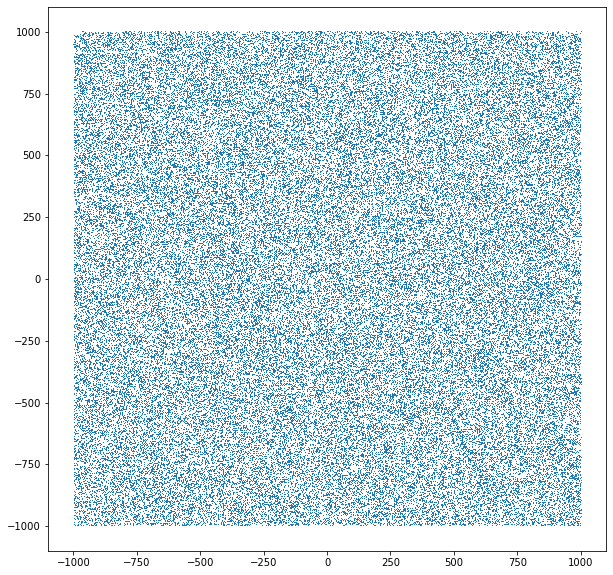

In [187]:
N_AB = 10 ** 5
RANGE_MIN_AB = -10 ** 3
RANGE_MAX_AB = 10 ** 3
points_Ax = [uniform(RANGE_MIN_AB, RANGE_MAX_AB) for _ in range(N_AB)]
points_Ay = [uniform(RANGE_MIN_AB, RANGE_MAX_AB) for _ in range(N_AB)]
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(points_Ax, points_Ay, ",")
plt.show()

### Generowanie punnktów ze zbioru B

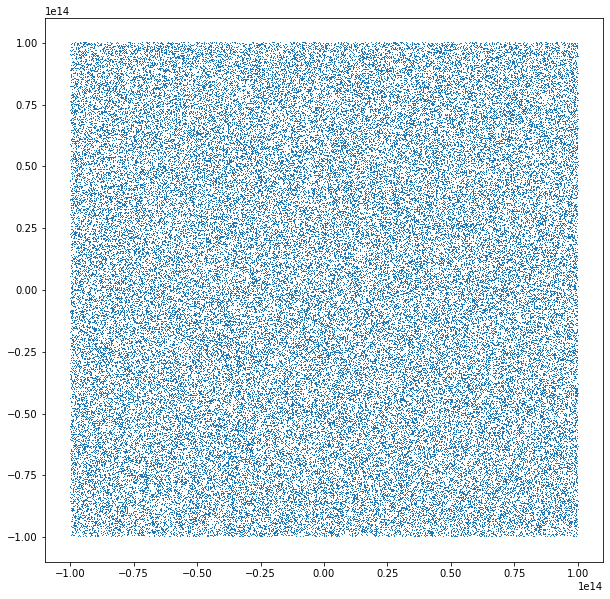

In [188]:
N_AB = 10 ** 5
RANGE_MIN_AB = -10 ** 14
RANGE_MAX_AB = 10 ** 14
points_Bx = [uniform(RANGE_MIN_AB,RANGE_MAX_AB) for _ in range(N_AB)]
points_By = [uniform(RANGE_MIN_AB,RANGE_MAX_AB) for _ in range(N_AB)]
plt.plot(points_Bx, points_By, ",")
plt.show()

### Generowanie punnktów ze zbioru C

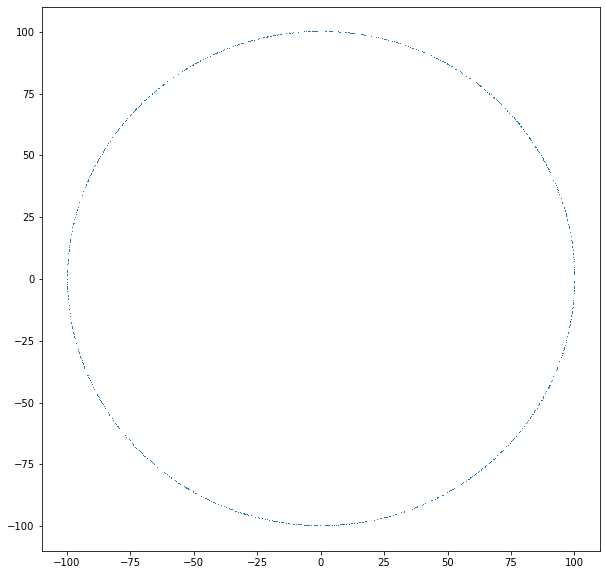

In [189]:
N_C = 10 ** 3
R = 100
points_Cx = []
points_Cy = []
for _ in range(N_C):
    t = uniform(0,2*pi)    # generowanie punktów na okręgu z postaci paramterycznej z sinusem i cosinusem
    points_Cx.append(cos(t)*R)
    points_Cy.append(sin(t)*R)
plt.plot(points_Cx, points_Cy, ",")
plt.show()

### Generowanie punnktów ze zbioru D

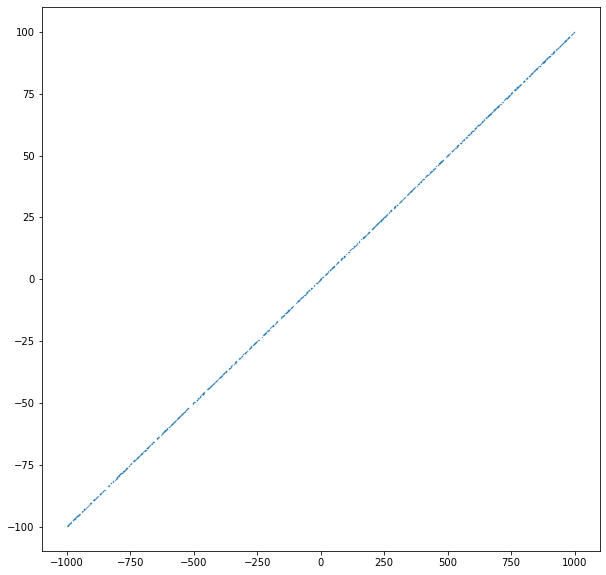

In [190]:
N_D = 10 ** 3
RANGE_MIN_D = -10 ** 3
RANGE_MAX_D = 10 ** 3
points_Dx = []
points_Dy = []
a = (A[1]-B[1])/(A[0]-B[0])  # współczynnik kierunkowy prostej
b = A[1] - A[0] *a           # wyraz wolny
for _ in range (N_D):
    x = uniform(RANGE_MIN_D,RANGE_MAX_D)
    points_Dx.append(x)                   # współrzędna x jest losowa
    points_Dy.append(a*x+ b)              # współrzędna y obliczana jest z równania funkcji liniowej
plt.scatter(points_Dx, points_Dy, s = 0.1)
plt.show()

# Rozdzielenie punktów ze względu na wyznaczniki i tolerancje

In [191]:
def make_groups(X, Y):
    x_res = [[[[], [], []] for _ in range(3)] for _ in range(4)]   # podział puntów, dla każdego z 4 wyznaczników są trzy
    y_res = [[[[], [], []] for _ in range(3)] for _ in range(4)]   # tablice w zależności od trzech tolerancji (epsilon) i
                                                                 # dla każdej tolerancji podział na punkty pod, nad i na prostej
    n = len(X)

    for point in range(n):    # dla każdego z n wygenerowanych punktów
        x = X[point]
        y = Y[point]

        matrix_3 = np.array([[A[0], A[1], 1],   # obliczam wyznacznik 3x3 z mojej implementacji
                             [B[0], B[1], 1],
                             [x, y, 1]])

        matrix_2 = np.array([[A[0] - x, A[1] - y],    # wyznacznik 2x2 mojej implementacji
                             [B[0] - x, B[1] - y]])
        dets = [np.linalg.det(matrix_2),    # w liście dets umieszczam wyniki wyznaczników bibliotecznych i mojej implementacji
                det_2x2(matrix_2),
                np.linalg.det(matrix_3),
                det_3x3(matrix_3)]

        for det in range(len(dets)):              # dla każdego z wyznaczników n-tego punktu
            for j in range(len(tolerances)):         # i dla każdej wartości tolerancji
                if abs(dets[det]) < tolerances[j]:      # klasyfikuję punkt jako znajdujący się na prostej, nad lub pod nią
                    x_res[det][j][0].append(x)
                    y_res[det][j][0].append(y)
                elif dets[det] > 0:
                    x_res[det][j][1].append(x)
                    y_res[det][j][1].append(y)
                else:
                    x_res[det][j][2].append(x)
                    y_res[det][j][2].append(y)

    return x_res, y_res

In [192]:
xA, yA = make_groups(points_Ax, points_Ay)
xB, yB = make_groups(points_Bx, points_By)
xC, yC = make_groups(points_Cx, points_Cy)
xD, yD = make_groups(points_Dx, points_Dy)

# Graficzne prezentacja wyników

##  Ukazanie podziału punktów ze wszystkich zbiorów wykonane przez każdy wyznacznik:

### Zestaw A

Wyznacznik 2x2 z  biblioteki numpy

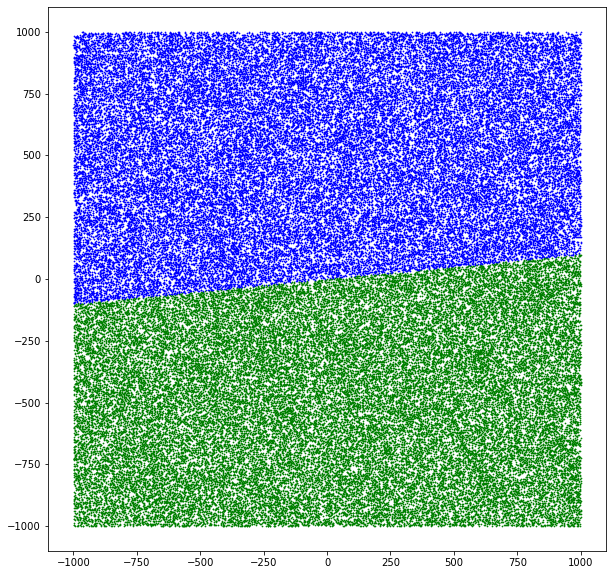

Punktów na prostej: 0
Punktów nad prostą: 50157
Punktów pod prostą: 49843


In [193]:
plt.rcParams["figure.figsize"] = (10,10)
for i in range(2, -1, -1):
    plt.scatter(xA[0][0][i], yA[0][0][i],s = 0.5,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xA[0][0][0]))}")    
print(f"Punktów nad prostą: {str(len(xA[0][0][1]))}")
print(f"Punktów pod prostą: {str(len(xA[0][0][2]))}")


Wyznacznik 2x2 implementowany przeze mnie


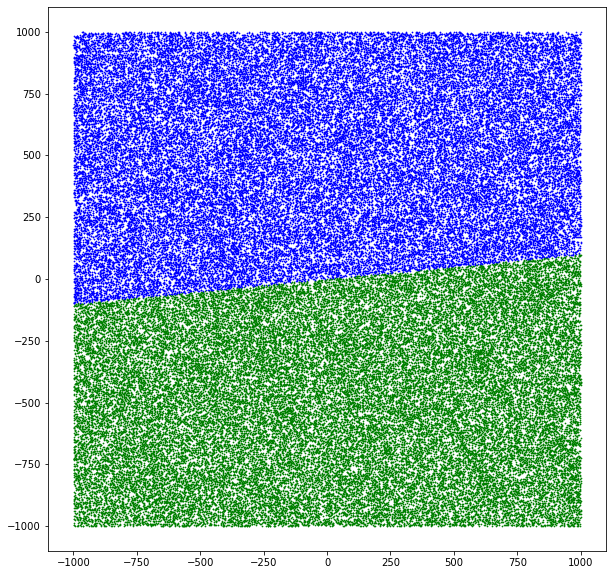

Punktów na prostej: 0
Punktów nad prostą: 50157
Punktów pod prostą: 49843


In [194]:
for i in range(2, -1, -1):
    plt.scatter(xA[1][0][i], yA[1][0][i],s = 0.5,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xA[1][0][0]))}")
print(f"Punktów nad prostą: {str(len(xA[1][0][1]))}")
print(f"Punktów pod prostą: {str(len(xA[1][0][2]))}")

Wyznacznik 3x3 z biblioteki numpy

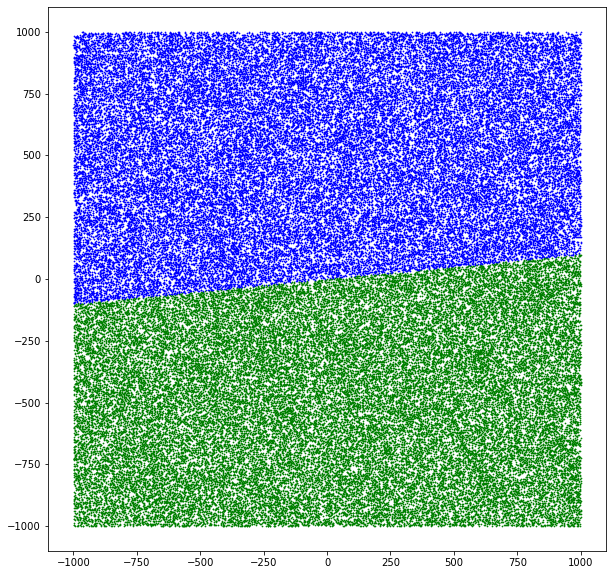

Punktów na prostej: 0
Punktów nad prostą: 50157
Punktów pod prostą: 49843


In [195]:
for i in range(2, -1, -1):
    plt.scatter(xA[2][0][i], yA[2][0][i],s = 0.5,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xA[2][0][0]))}")
print(f"Punktów nad prostą: {str(len(xA[2][0][1]))}")
print(f"Punktów pod prostą: {str(len(xA[2][0][2]))}")

Wyznacznik 3x3 zaimplementowany przeze mnie

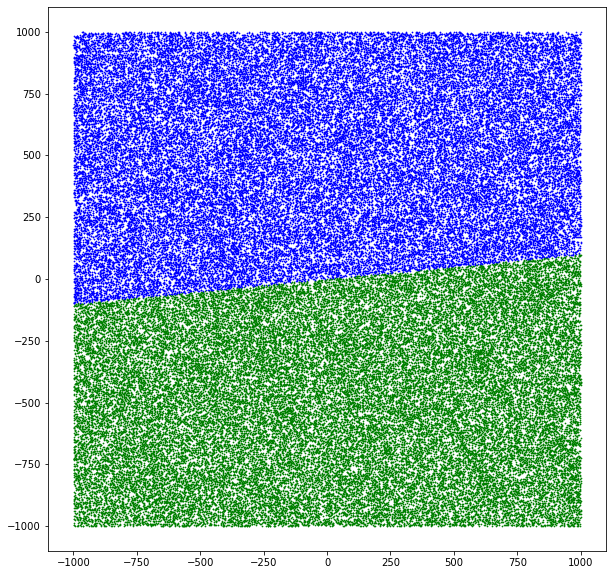

Punktów na prostej: 0
Punktów nad prostą: 50157
Punktów pod prostą: 49843


In [196]:
for i in range(2, -1, -1):
    plt.scatter(xA[3][0][i], yA[3][0][i],s = 0.5,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xA[3][0][0]))}")
print(f"Punktów nad prostą: {str(len(xA[3][0][1]))}")
print(f"Punktów pod prostą: {str(len(xA[3][0][2]))}")

### Zestaw B

Wyznacznik 2x2 z biblioteki numpy

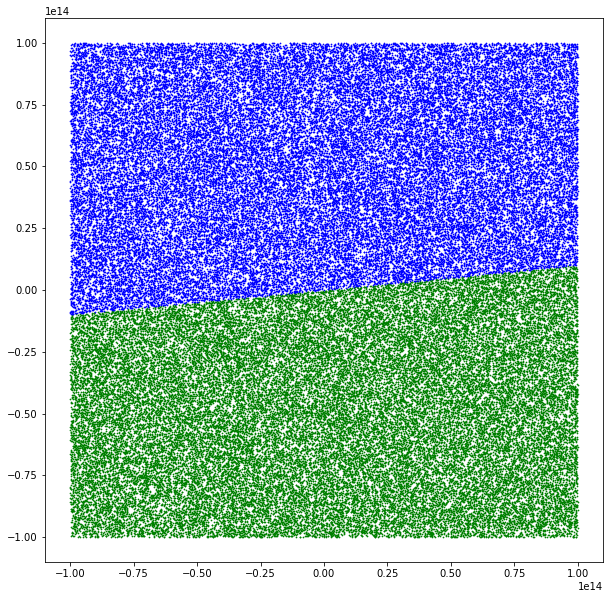

Punktów na prostej: 0
Punktów nad prostą: 49838
Punktów pod prostą: 50162


In [197]:
for i in range(2, -1, -1):
    plt.scatter(xB[0][0][i], yB[0][0][i],s = 0.5,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xB[0][0][0]))}")
print(f"Punktów nad prostą: {str(len(xB[0][0][1]))}")
print(f"Punktów pod prostą: {str(len(xB[0][0][2]))}")

Wyznacznik 2x2 mojej implementacji

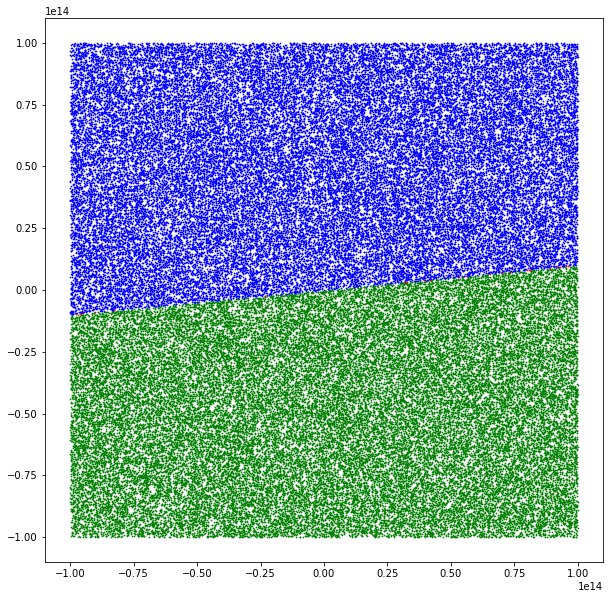

Punktów na prostej: 24
Punktów nad prostą: 49825
Punktów pod prostą: 50151


In [198]:
for i in range(2, -1, -1):
    plt.scatter(xB[1][0][i], yB[1][0][i],s = 0.5,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xB[1][0][0]))}")
print(f"Punktów nad prostą: {str(len(xB[1][0][1]))}")
print(f"Punktów pod prostą: {str(len(xB[1][0][2]))}")


Wyznacznik 3x3 z biblioteki numpy

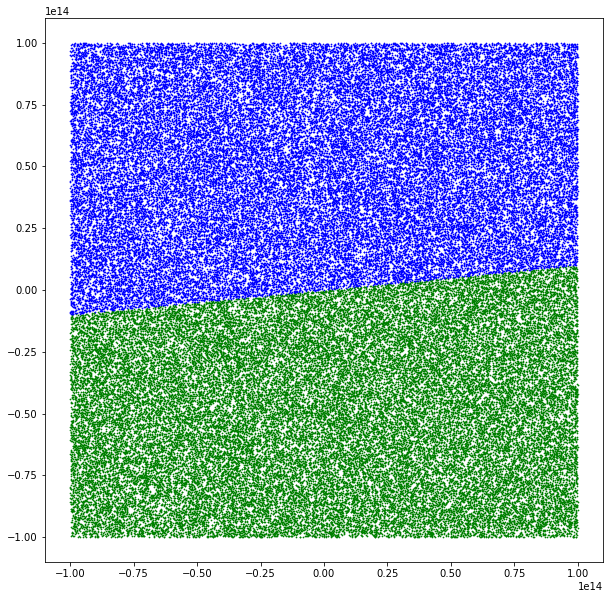

Punktów na prostej: 0
Punktów nad prostą: 49834
Punktów pod prostą: 50166


In [199]:
for i in range(2, -1, -1):
    plt.scatter(xB[2][0][i], yB[2][0][i],s = 0.5,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xB[2][0][0]))}")
print(f"Punktów nad prostą: {str(len(xB[2][0][1]))}")
print(f"Punktów pod prostą: {str(len(xB[2][0][2]))}")


Wyznacznik 3x3 mojej implementacji

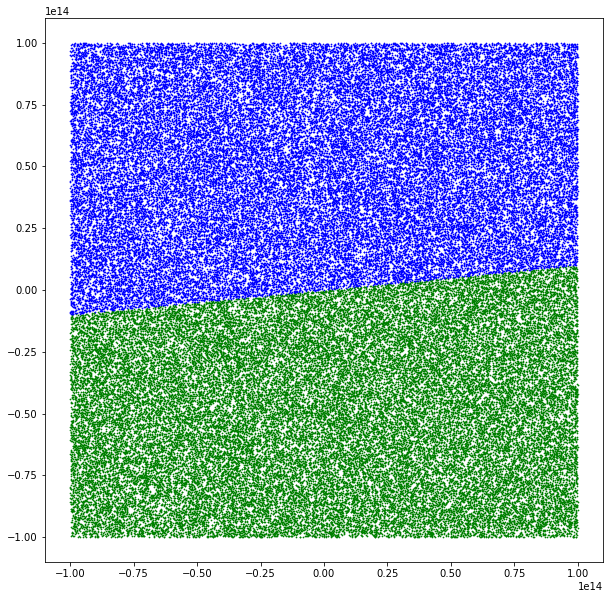

Punktów na prostej: 0
Punktów nad prostą: 49834
Punktów pod prostą: 50166


In [200]:
for i in range(2, -1, -1):
    plt.scatter(xB[3][0][i], yB[3][0][i],s = 0.5,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xB[3][0][0]))}")
print(f"Punktów nad prostą: {str(len(xB[3][0][1]))}")
print(f"Punktów pod prostą: {str(len(xB[3][0][2]))}")

### Zestaw C

Wyznacznik 2x2 z biblioteki numpy

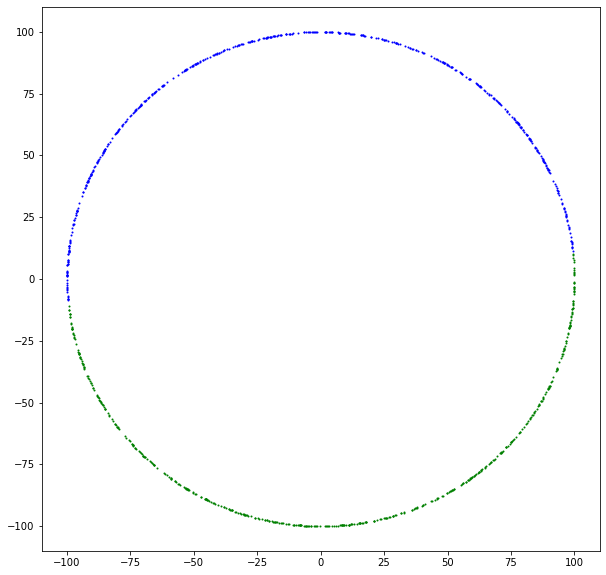

Punktów na prostej: 0
Punktów nad prostą: 505
Punktów pod prostą: 495


In [201]:
for i in range(2, -1, -1):
    plt.scatter(xC[0][0][i], yC[0][0][i],s = 1,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xC[0][0][0]))}")
print(f"Punktów nad prostą: {str(len(xC[0][0][1]))}")
print(f"Punktów pod prostą: {str(len(xC[0][0][2]))}")

Wyznacznik 2x2 mojej implementacji

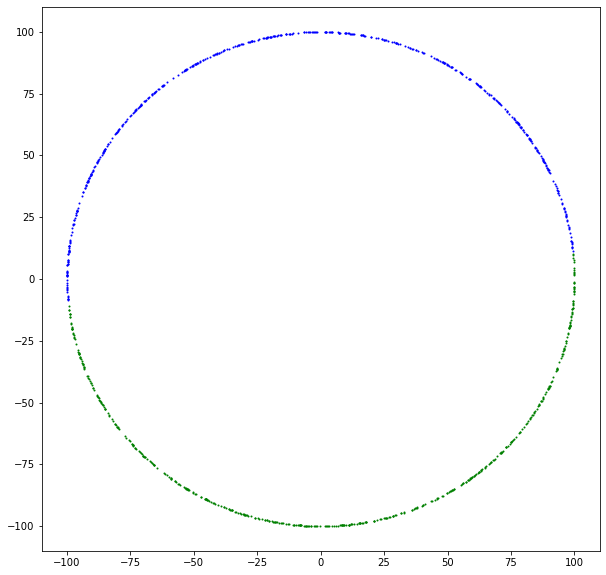

Punktów na prostej: 0
Punktów nad prostą: 505
Punktów pod prostą: 495


In [202]:
for i in range(2, -1, -1):
    plt.scatter(xC[1][0][i], yC[1][0][i],s = 1,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xC[1][0][0]))}")
print(f"Punktów nad prostą: {str(len(xC[1][0][1]))}")
print(f"Punktów pod prostą: {str(len(xC[1][0][2]))}")

Wyznacznik 3x3 z biblioteki numpy

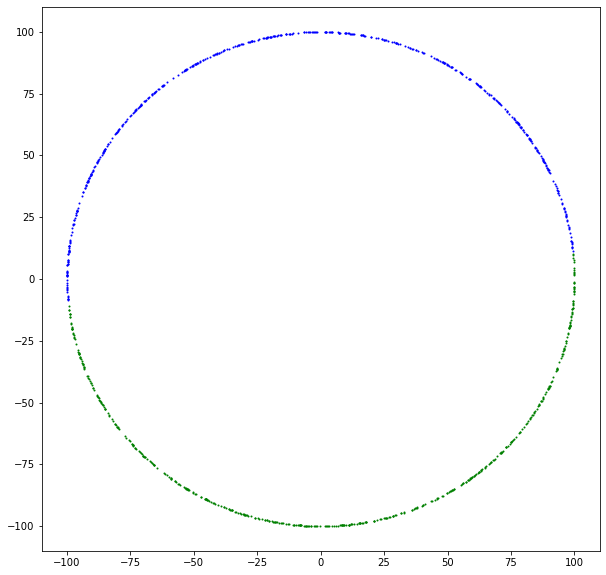

Punktów na prostej: 0
Punktów nad prostą: 505
Punktów pod prostą: 495


In [203]:
for i in range(2, -1, -1):
    plt.scatter(xC[2][0][i], yC[2][0][i],s = 1,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xC[2][0][0]))}")
print(f"Punktów nad prostą: {str(len(xC[2][0][1]))}")
print(f"Punktów pod prostą: {str(len(xC[2][0][2]))}")

Wyznacznik 3x3 mojej implementacji

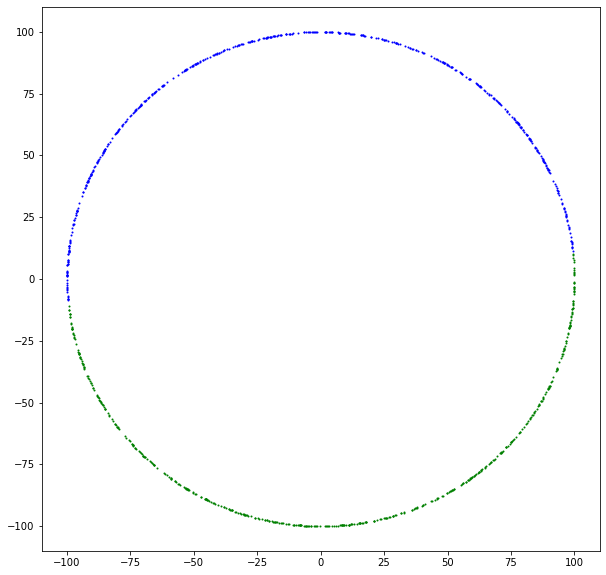

Punktów na prostej: 0
Punktów nad prostą: 505
Punktów pod prostą: 495


In [204]:
for i in range(2, -1, -1):
    plt.scatter(xC[3][0][i], yC[3][0][i],s = 1,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xC[3][0][0]))}")
print(f"Punktów nad prostą: {str(len(xC[3][0][1]))}")
print(f"Punktów pod prostą: {str(len(xC[3][0][2]))}")

### Zestaw D

Wyznacznik 2x2 z biblioteki numpy

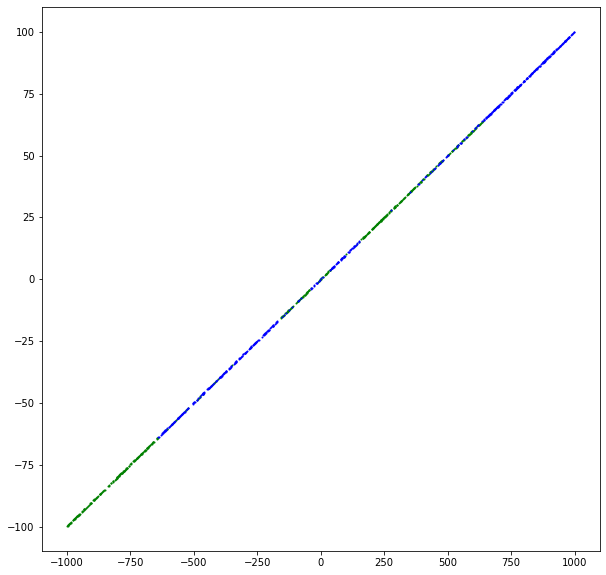

Punktów na prostej: 0
Punktów nad prostą: 510
Punktów pod prostą: 490


In [205]:
for i in range(2, -1, -1):
    plt.scatter(xD[0][0][i], yD[0][0][i],s = 1,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xD[0][0][0]))}")
print(f"Punktów nad prostą: {str(len(xD[0][0][1]))}")
print(f"Punktów pod prostą: {str(len(xD[0][0][2]))}")


Wyznacznik 2x2 mojej implementacji

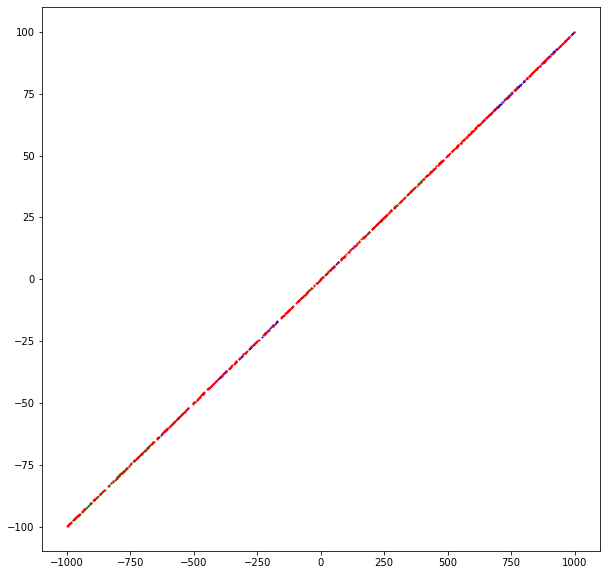

Punktów na prostej: 668
Punktów nad prostą: 179
Punktów pod prostą: 153


In [206]:
for i in range(2, -1, -1):
    plt.scatter(xD[1][0][i], yD[1][0][i],s = 1,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xD[1][0][0]))}")
print(f"Punktów nad prostą: {str(len(xD[1][0][1]))}")
print(f"Punktów pod prostą: {str(len(xD[1][0][2]))}")


Wyznacznik 3x3 z biblioteki numpy

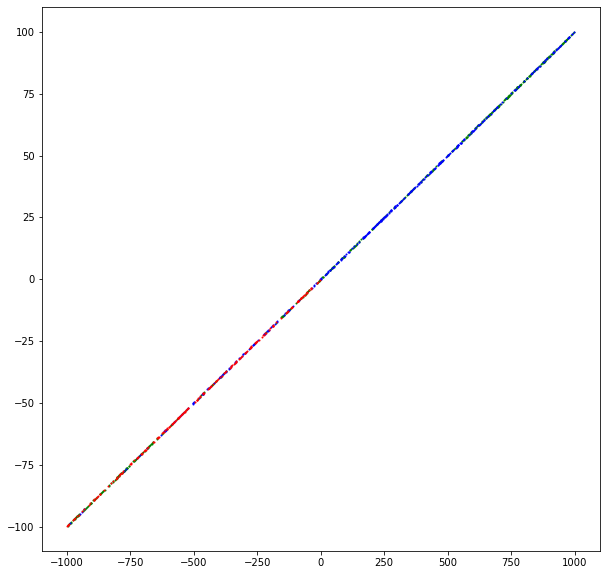

Punktów na prostej: 195
Punktów nad prostą: 342
Punktów pod prostą: 463


In [207]:
for i in range(2, -1, -1):
    plt.scatter(xD[2][0][i], yD[2][0][i],s = 1,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xD[2][0][0]))}")
print(f"Punktów nad prostą: {str(len(xD[2][0][1]))}")
print(f"Punktów pod prostą: {str(len(xD[2][0][2]))}")

Wyznacznik 3x3 mojej implementacji

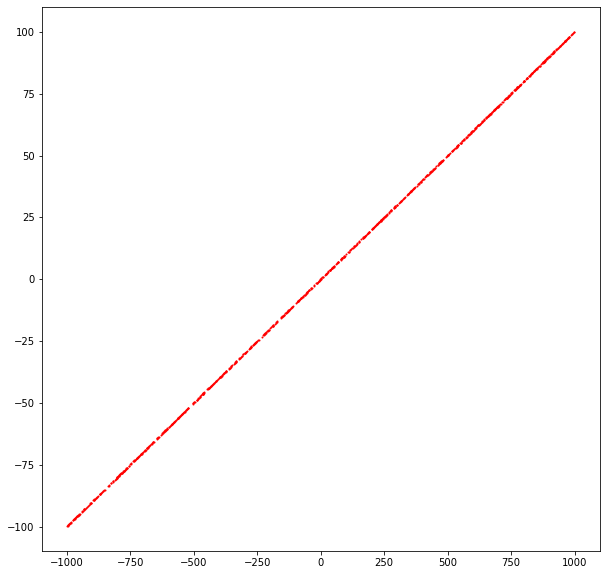

Punktów na prostej: 1000
Punktów nad prostą: 0
Punktów pod prostą: 0


In [208]:
for i in range(2, -1, -1):
    plt.scatter(xD[3][0][i], yD[3][0][i],s = 1,c=colors[i])
plt.show()
print(f"Punktów na prostej: {str(len(xD[3][0][0]))}")
print(f"Punktów nad prostą: {str(len(xD[3][0][1]))}")
print(f"Punktów pod prostą: {str(len(xD[3][0][2]))}")

# Różnice w podziale punktów między wyznacznikami 2x2 oraz między 3x3

In [209]:
def differences(X, Y, det_no_1, det_no_2, tol):
    pointsA = []
    pointsB = []

    len_A_pod = len(X[det_no_1][tol][2])   # wyliczam długości konkretnych podzbiorów
    len_B_pod = len(X[det_no_2][tol][2])
    len_A_nad = len(X[det_no_1][tol][1])
    len_B_nad = len(X[det_no_2][tol][1])
    len_A_nalini = len(X[det_no_1][tol][0])
    len_B_nalini = len(X[det_no_2][tol][0])
                                            # dla punktów znjdującyc się w różnych podzbiorach przyporządkowuję -1 jeśli są pod
    for i in range(len_A_pod):              #prostą, 1 jeśli są nad prostą i 0 jeśli są na prostej
        x = X[det_no_1][tol][2][i]
        y = Y[det_no_1][tol][2][i]
        pointsA.append(((x, y),-1))

    for i in range(len_B_pod):
        x = X[det_no_2][tol][2][i]
        y = Y[det_no_2][tol][2][i]
        pointsB.append(((x, y),-1))

    for i in range(len_A_nad):
        x = X[det_no_1][tol][1][i]
        y = Y[det_no_1][tol][1][i]
        pointsA.append(((x, y),1))

    for i in range(len_B_nad):
        x = X[det_no_2][tol][1][i]
        y = Y[det_no_2][tol][1][i]
        pointsB.append(((x, y),1))

    for i in range(len_A_nalini):
        x = X[det_no_1][tol][0][i]
        y = Y[det_no_1][tol][0][i]
        pointsA.append(((x, y),0))

    for i in range(len_B_nalini):
        x = X[det_no_2][tol][0][i]
        y = Y[det_no_2][tol][0][i]
        pointsB.append(((x, y),0))

    pointsA.sort()
    pointsB.sort()
                            # w posortowanych listach sprawdzam, czy każdy punkt ma taką samą klasyfikację (-1, 1 czy 0)
    n = len(pointsA)        # jeśli nie to doliczam taki punkt do listy niezgodności
    results = []
    for i in range(n):
        if pointsA[i][1] != pointsB[i][1]:
            results.append(pointsA[i][0])

    return results

In [210]:
def show_differences(x, y, det1, det2, tol):
    diff =differences(x, y, det1, det2, tol)
    print("Różnic: " + str(len(diff)))

    for i in range(min(10, len(diff))):
        print('x: ' + str(diff[i][0]) + ', y: ' + str(diff[i][1]))

    if len(diff) > 10:
        print('i jeszcze ' + str(len(diff) - 10) + ' punktów...')

    if len(diff) != 0:
        plt.scatter([i[0] for i in diff], [i[1] for i in diff])
        plt.show()

### Zestaw A

2x2 z biblioteki numpy i mojej implementacji

In [211]:
show_differences(xA, yA, 0, 1, 0,)

Różnic: 0


3x3 z biblioteki numpy i mojej implementacji

In [212]:
show_differences(xA, yA, 2, 3, 0,)

Różnic: 0


### Zestaw B

2x2 z biblioteki numpy i mojej implementacji

Różnic: 26
x: -97643351356812.22, y: -9770994945279.75
x: -96183143752954.78, y: -9615884298275.672
x: -95144923886803.03, y: -9414983612930.734
x: -90104986510862.77, y: -8968995935004.172
x: -82702951051911.75, y: -8270959936797.3125
x: -71600960052176.84, y: -7121485944698.953
x: -68923645925440.78, y: -6859479416206.656
x: -23317613096779.11, y: -2333474258156.047
x: 31962293270881.266, y: 3207971731554.9844
x: 32625357615582.984, y: 3278552463289.9375
i jeszcze 16 punktów...


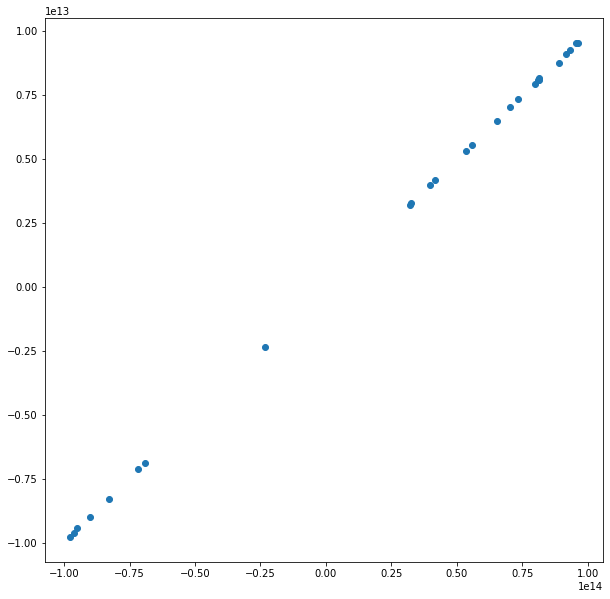

In [213]:
show_differences(xB, yB, 0, 1, 0)

3x3 z biblioteki numpy i mojej implementacji

In [214]:
show_differences(xB, yB, 2, 3, 0,)

Różnic: 0


### Zestaw C

2x2 z biblioteki numpy i mojej implementacji

In [215]:
show_differences(xC, yC, 0, 1, 0,)

Różnic: 0


3x3 z biblioteki numpy i mojej implementacji

In [216]:
show_differences(xC, yC, 2, 3, 0,)

Różnic: 0


### Zestaw D

2x2 z biblioteki numpy i mojej implementacji

Różnic: 684
x: -998.7305770151091, y: -99.77305770151092
x: -996.704456550424, y: -99.5704456550424
x: -994.90487813157, y: -99.39048781315701
x: -994.4101242735633, y: -99.34101242735633
x: -991.9416875351284, y: -99.09416875351285
x: -990.7121968946433, y: -98.97121968946433
x: -985.997150888962, y: -98.49971508889621
x: -985.1580732192804, y: -98.41580732192804
x: -982.7337971132213, y: -98.17337971132214
x: -971.1950255795572, y: -97.01950255795573
i jeszcze 674 punktów...


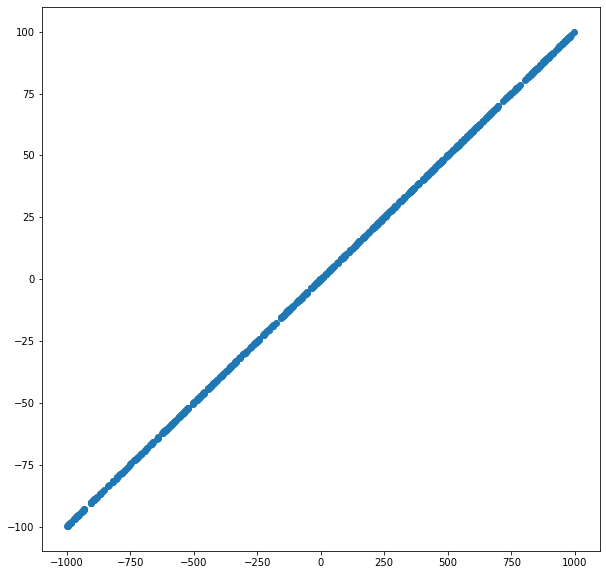

In [217]:
show_differences(xD, yD, 0, 1, 0)

3x3 z biblioteki numpy i mojej implementacji

Różnic: 805
x: -996.704456550424, y: -99.5704456550424
x: -993.9708583893805, y: -99.29708583893806
x: -991.9416875351284, y: -99.09416875351285
x: -989.6312557075089, y: -98.8631255707509
x: -986.2251910893798, y: -98.52251910893798
x: -985.997150888962, y: -98.49971508889621
x: -985.1580732192804, y: -98.41580732192804
x: -982.7337971132213, y: -98.17337971132214
x: -975.1424162888292, y: -97.41424162888293
x: -971.1950255795572, y: -97.01950255795573
i jeszcze 795 punktów...


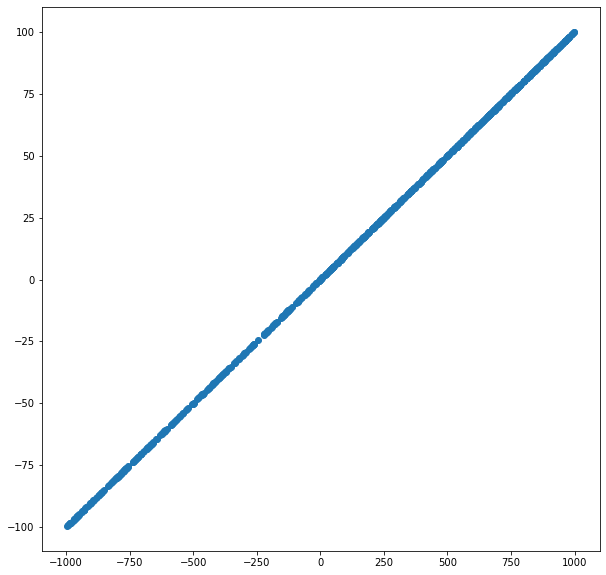

In [218]:
show_differences(xD, yD, 2, 3, 0,)

# Różnice w klasyfikacji dla różnych warości epsilon

In [219]:
epsilon_string = ['1e-18', '1e-14', '1e-10']
def reformat_number(number):
    if number == 0:
        return "  0  "
    if log10(number) <1:
        return f"  {str(number)}  "
    if log10(number)<2:
        return f" {str(number)}  "
    if log10(number)<3:
        return f" {str(number)} "
    if log10(number)<4:
        return f" {str(number)}"
    if log10(number)<5:
        return str(number)
        
def generate_diagram(x, det):      #funkcja do przedstawiania wyników na wykresach słupkowych
    fig, ax = plt.subplots(figsize = (12, 8))
    bar_width = 0.25
    
    under  = [len(x[det][0][2]), len(x[det][1][2]), len(x[det][2][2])]
    above  = [len(x[det][0][1]), len(x[det][1][1]), len(x[det][2][1])]
    linear = [len(x[det][0][0]), len(x[det][1][0]), len(x[det][2][0])]
    
    bar1 = np.arange(3)
    bar2 = [x + bar_width for x in bar1]
    bar3 = [x + bar_width for x in bar2]
    
    plt.bar(bar1, under, color = 'b', width = bar_width, label = 'Pod prostą', data = under)
    plt.bar(bar2, above, color = 'g', width = bar_width, label = 'Nad prostą')
    plt.bar(bar3, linear, color = 'r', width = bar_width, label = 'Na prostej')
    
    plt.xlabel('Tolerancja', fontweight = 'bold', fontsize = 15)
    plt.ylabel('Liczba ', fontweight = 'bold', fontsize = 15)
    plt.xticks([(r + bar_width) for r in range(len(under))], epsilon_string)
    
    plt.legend()
    plt.show()
    print(f"                  Pod  :  Nad  : Na linii")
    print(f"Precyzja {epsilon_string[0]} : {reformat_number(under[0])} : {reformat_number(above[0])} : {reformat_number(linear[0])}")
    print(f"Precyzja {epsilon_string[1]} : {reformat_number(under[1])} : {reformat_number(above[1])} : {reformat_number(linear[1])}")
    print(f"Precyzja {epsilon_string[2]} : {reformat_number(under[2])} : {reformat_number(above[2])} : {reformat_number(linear[2])}")

### Zestaw A

2x2 z biblioteki numpy

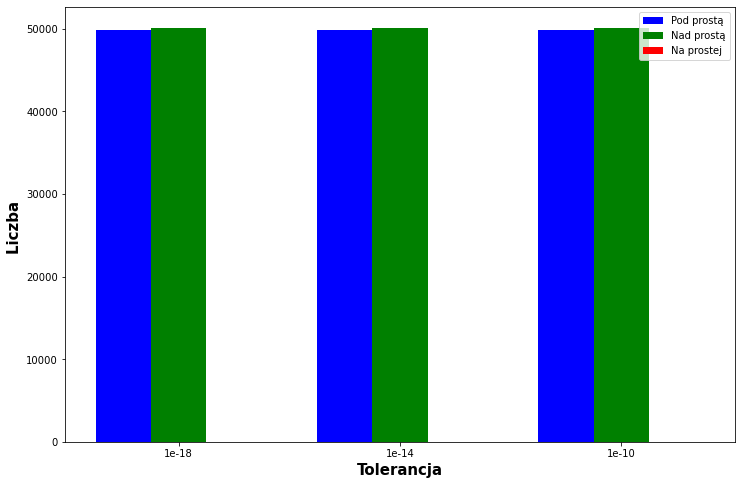

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 : 49843 : 50157 :   0  
Precyzja 1e-14 : 49843 : 50157 :   0  
Precyzja 1e-10 : 49843 : 50157 :   0  


In [220]:
generate_diagram(xA, 0)

2x2 mojej impelemntacji

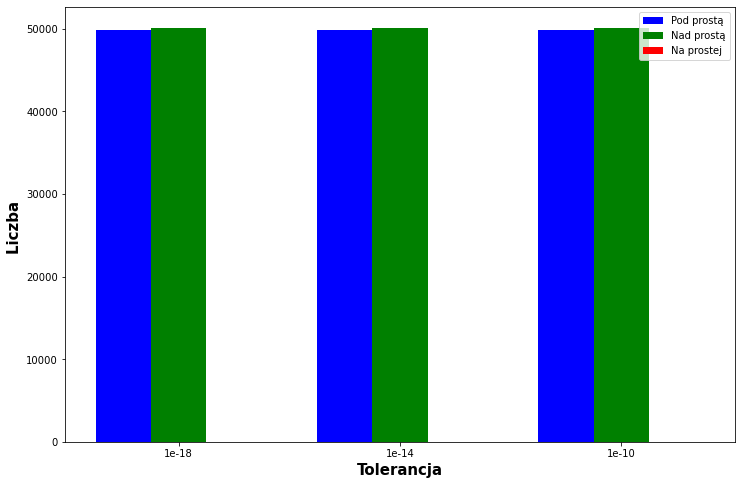

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 : 49843 : 50157 :   0  
Precyzja 1e-14 : 49843 : 50157 :   0  
Precyzja 1e-10 : 49843 : 50157 :   0  


In [221]:
generate_diagram(xA, 1)

3x3 z biblioteki numpy

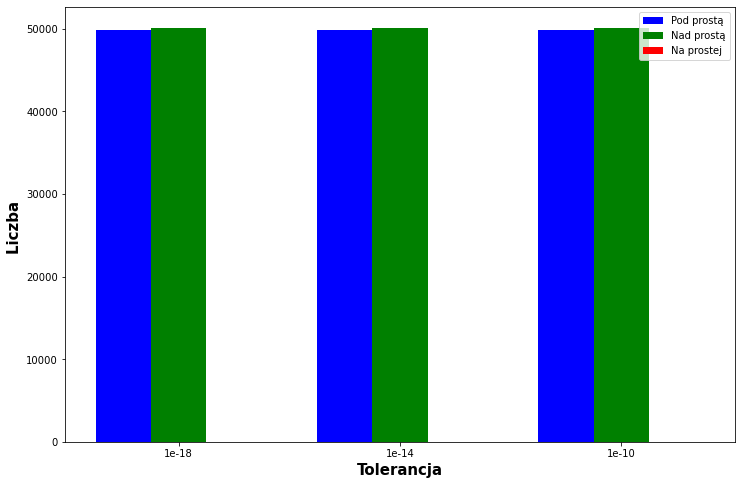

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 : 49843 : 50157 :   0  
Precyzja 1e-14 : 49843 : 50157 :   0  
Precyzja 1e-10 : 49843 : 50157 :   0  


In [222]:
generate_diagram(xA, 2)

3x3 mojej impelemntacji

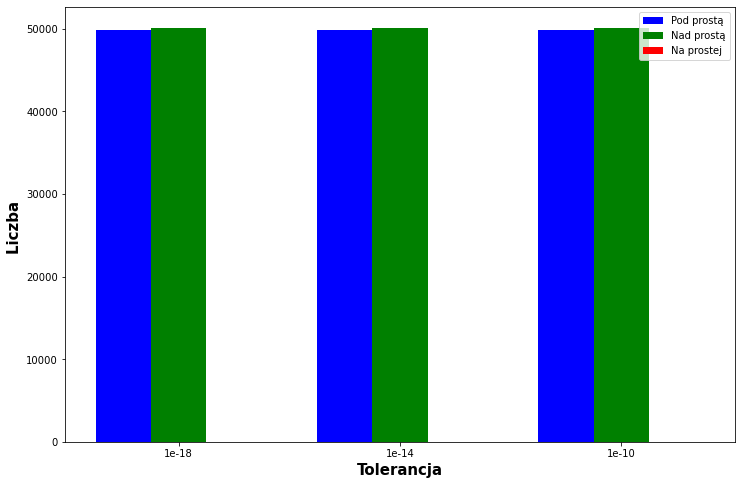

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 : 49843 : 50157 :   0  
Precyzja 1e-14 : 49843 : 50157 :   0  
Precyzja 1e-10 : 49843 : 50157 :   0  


In [223]:
generate_diagram(xA, 3)

### Zestaw B

2x2 z biblioteki numpy

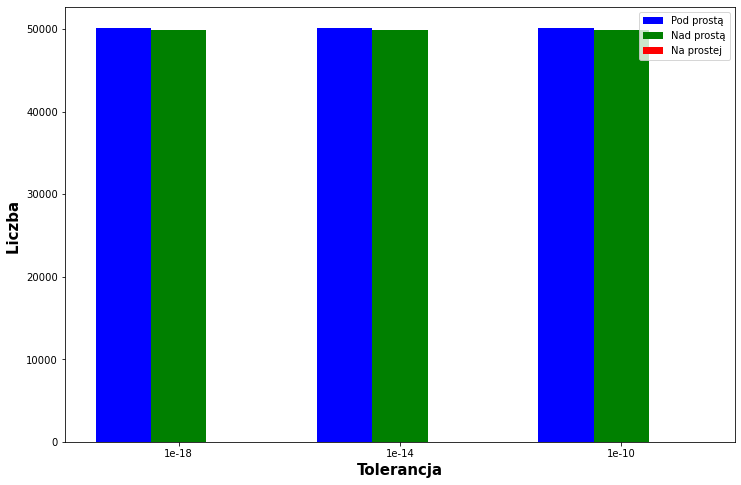

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 : 50162 : 49838 :   0  
Precyzja 1e-14 : 50162 : 49838 :   0  
Precyzja 1e-10 : 50162 : 49838 :   0  


In [224]:
generate_diagram(xB, 0)

2x2 mojej impelemntacji

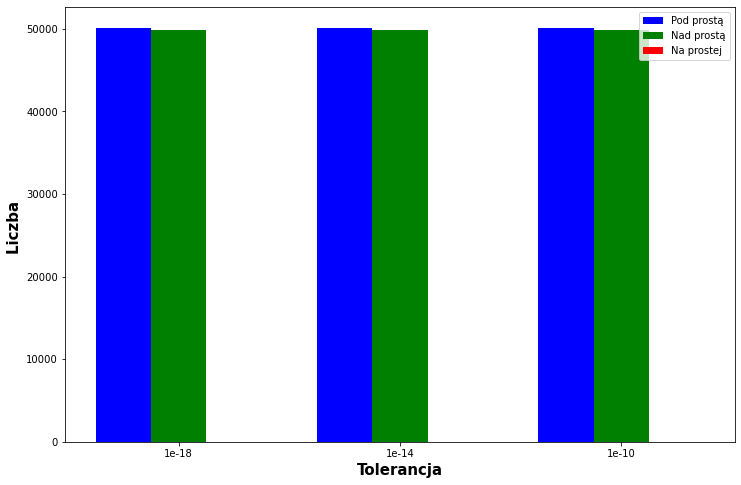

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 : 50151 : 49825 :  24  
Precyzja 1e-14 : 50151 : 49825 :  24  
Precyzja 1e-10 : 50151 : 49825 :  24  


In [225]:
generate_diagram(xB, 1)

3x3 z biblioteki numpy

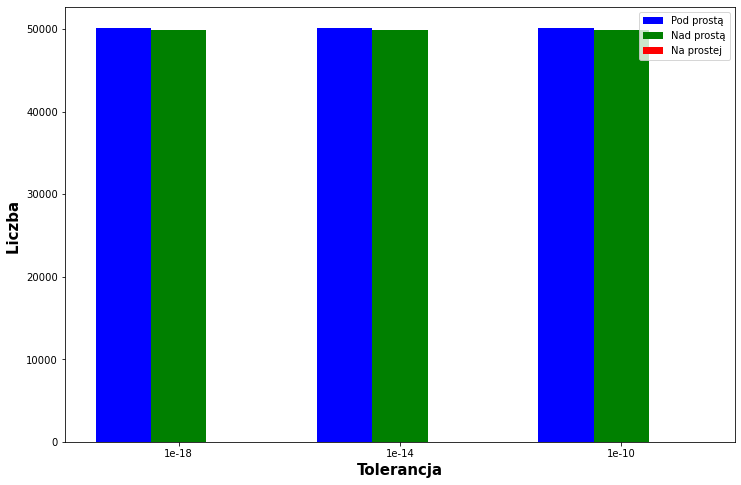

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 : 50166 : 49834 :   0  
Precyzja 1e-14 : 50166 : 49834 :   0  
Precyzja 1e-10 : 50166 : 49834 :   0  


In [226]:
generate_diagram(xB, 2)

3x3 mojej impelemntacji

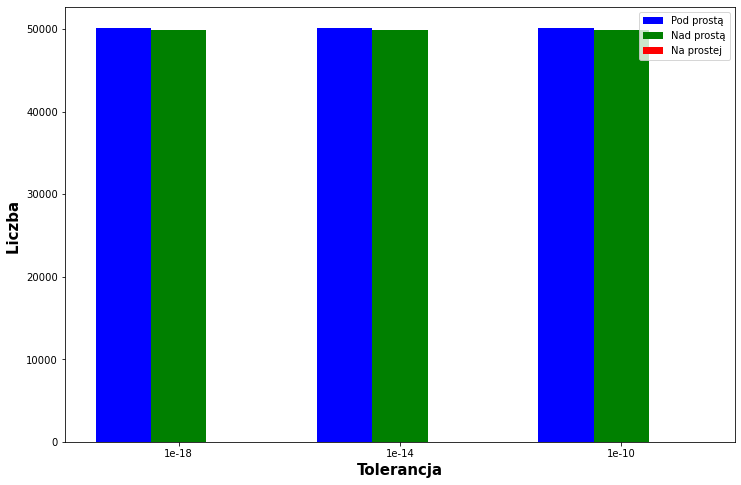

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 : 50166 : 49834 :   0  
Precyzja 1e-14 : 50166 : 49834 :   0  
Precyzja 1e-10 : 50166 : 49834 :   0  


In [227]:
generate_diagram(xB, 3)

### Zestaw C

2x2 z biblioteki numpy

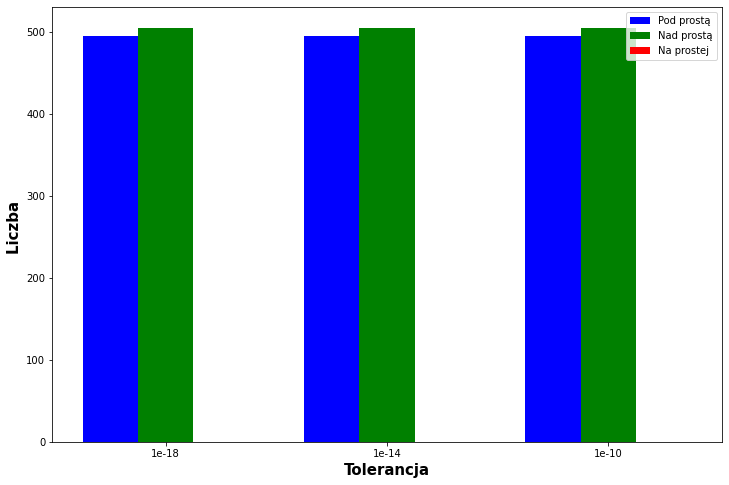

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 :  495  :  505  :   0  
Precyzja 1e-14 :  495  :  505  :   0  
Precyzja 1e-10 :  495  :  505  :   0  


In [228]:
generate_diagram(xC, 0)

2x2 mojej impelemntacji

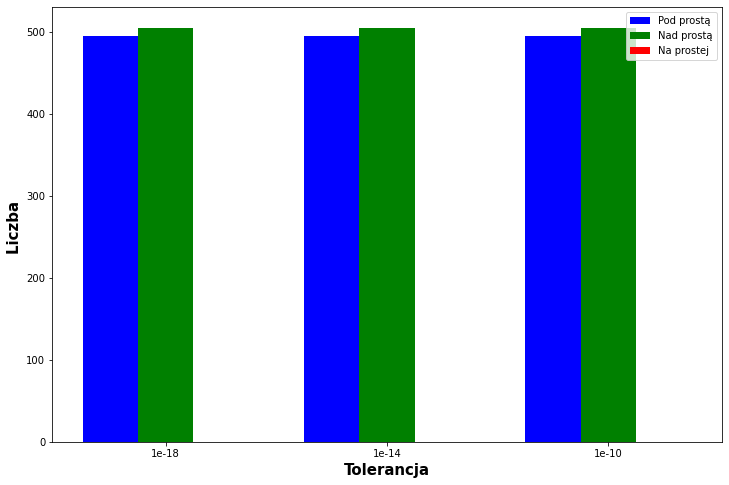

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 :  495  :  505  :   0  
Precyzja 1e-14 :  495  :  505  :   0  
Precyzja 1e-10 :  495  :  505  :   0  


In [229]:
generate_diagram(xC, 1)

3x3 z biblioteki numpy

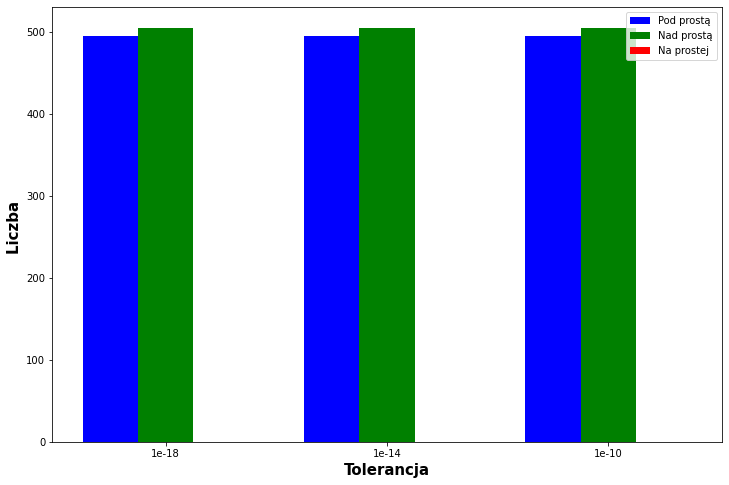

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 :  495  :  505  :   0  
Precyzja 1e-14 :  495  :  505  :   0  
Precyzja 1e-10 :  495  :  505  :   0  


In [230]:
generate_diagram(xC, 2)

3x3 mojej impelemntacji

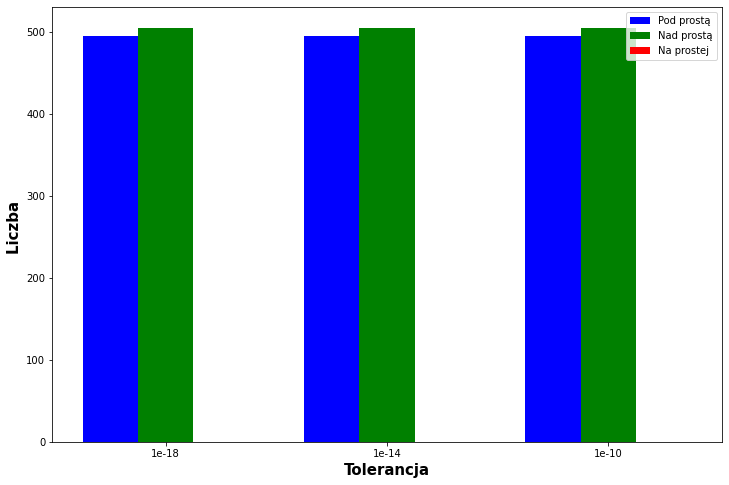

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 :  495  :  505  :   0  
Precyzja 1e-14 :  495  :  505  :   0  
Precyzja 1e-10 :  495  :  505  :   0  


In [231]:
generate_diagram(xC, 3)

### Zestaw D

2x2 z biblioteki numpy

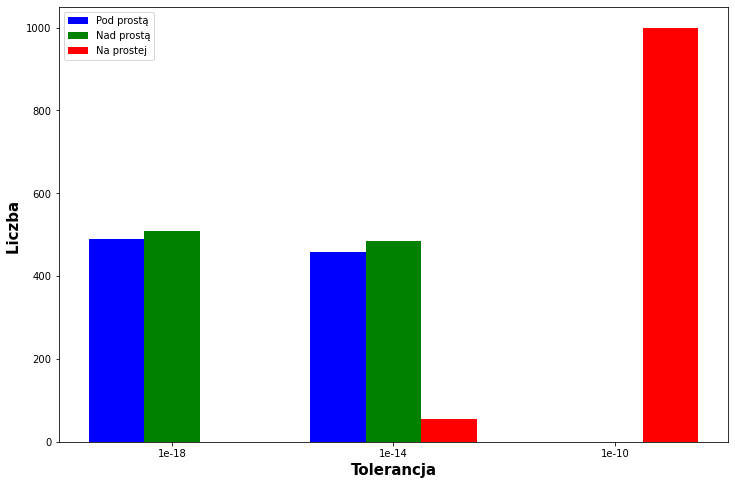

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 :  490  :  510  :   0  
Precyzja 1e-14 :  459  :  485  :  56  
Precyzja 1e-10 :   0   :   0   :  1000


In [232]:
generate_diagram(xD, 0)

2x2 mojej implementacji

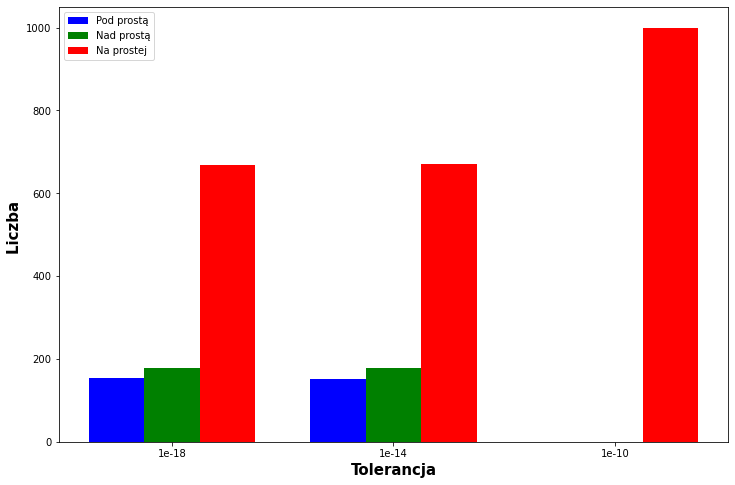

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 :  153  :  179  :  668 
Precyzja 1e-14 :  151  :  178  :  671 
Precyzja 1e-10 :   0   :   0   :  1000


In [233]:
generate_diagram(xD, 1)

3x3 z biblioteki numpy

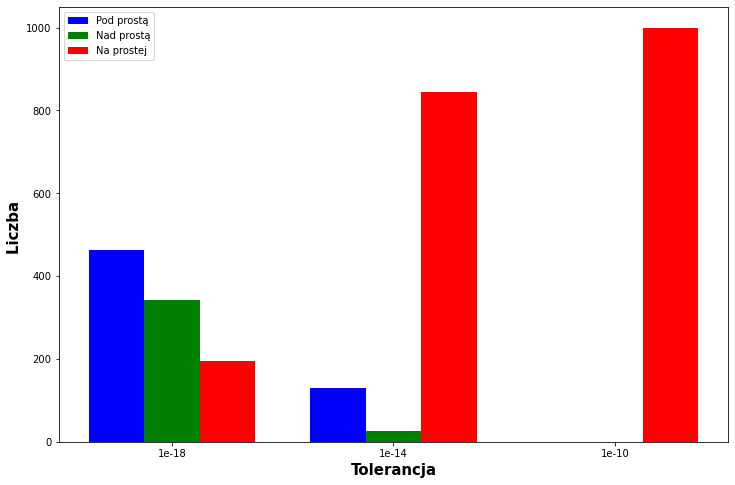

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 :  463  :  342  :  195 
Precyzja 1e-14 :  130  :  25   :  845 
Precyzja 1e-10 :   0   :   0   :  1000


In [234]:
generate_diagram(xD, 2)

3x3 mojej impelemntacji

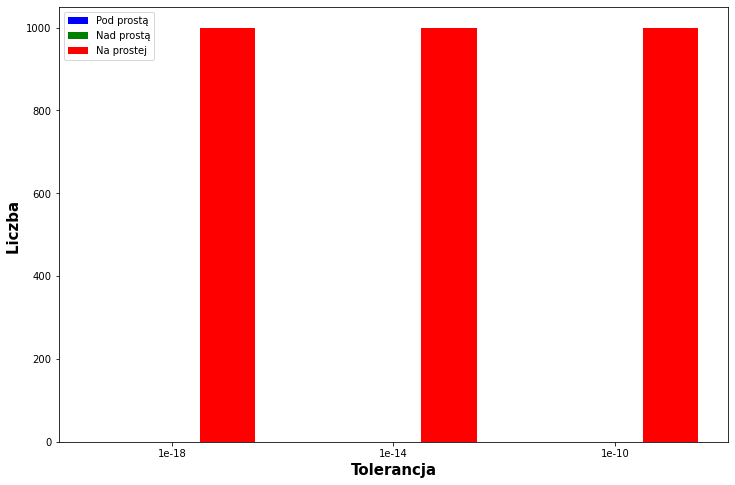

                  Pod  :  Nad  : Na linii
Precyzja 1e-18 :   0   :   0   :  1000
Precyzja 1e-14 :   0   :   0   :  1000
Precyzja 1e-10 :   0   :   0   :  1000


In [235]:
generate_diagram(xD, 3)